In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import numpy as np

2) Εισαγωγή Δεδομένων μετά την εξόρυξη

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
EVTweets = pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/BD2021/Final Exercise/Twitter/EVtweets.xlsx")

In [4]:
EVTweets

Unnamed: 0                      created_at  ... favorite_count retweeted
0             0  Sun Jul 04 10:23:40 +0000 2021  ...              0     False
1             1  Sat Jul 03 18:58:04 +0000 2021  ...              0     False
2             2  Sat Jul 03 18:55:21 +0000 2021  ...              6     False
3             3  Sat Jul 03 18:29:38 +0000 2021  ...              0     False
4             4  Sat Jul 03 13:55:38 +0000 2021  ...              0     False
..          ...                             ...  ...            ...       ...
196         196  Sun Jun 27 02:47:46 +0000 2021  ...              0     False
197         197  Sat Jun 26 16:30:54 +0000 2021  ...              0     False
198         198  Sat Jun 26 15:59:56 +0000 2021  ...              0     False
199         199  Sat Jun 26 13:30:05 +0000 2021  ...              1     False
200         200  Sat Jun 26 11:29:58 +0000 2021  ...              2     False

[201 rows x 7 columns]

3)	Να κάνετε καθαρισμό των δεδομένων από άχρηστα στοιχεία, NaN values, περιττά κείμενα και επιπλέον στήλες.

In [5]:
EVTweets2 = EVTweets[['created_at','text']]

In [6]:
EVTweets2

created_at                                               text
0    Sun Jul 04 10:23:40 +0000 2021  RT @Kyvernitiparat1: Με γοργούς ρυθμούς επεκτε...
1    Sat Jul 03 18:58:04 +0000 2021  RT @elam5753: @angie22gr Με τις επιτυχίες της ...
2    Sat Jul 03 18:55:21 +0000 2021  @angie22gr Με τις επιτυχίες της κυβέρνησης,7 δ...
3    Sat Jul 03 18:29:38 +0000 2021  RT @FoFotia: "Η ΔΕΗ υποδέχεται την ηλεκτροκίνη...
4    Sat Jul 03 13:55:38 +0000 2021  Δήμος Ιθάκης: Επενδύει πάνω από 600.000 ευρώ σ...
..                              ...                                                ...
196  Sun Jun 27 02:47:46 +0000 2021  #TeoKanistras Peugeot: Προσιτή και προηγμένη η...
197  Sat Jun 26 16:30:54 +0000 2021  Σκρέκας: Στόχος να αναβαθμίζονται ενεργειακά π...
198  Sat Jun 26 15:59:56 +0000 2021  Peugeot: Προσιτή και προηγμένη ηλεκτροκίνηση γ...
199  Sat Jun 26 13:30:05 +0000 2021  @05oJSrm6YnWN5HJ @cynaegeirus Και βυσσινί,επίσ...
200  Sat Jun 26 11:29:58 +0000 2021  Άμεση μετάβαση προς την ηλεκτροκίνηση #moneyre...

[201 rows x 2 columns]

In [7]:
EVTweets2.dtypes

created_at    object
text          object
dtype: object

In [8]:
EVTweets2.isnull()

created_at   text
0         False  False
1         False  False
2         False  False
3         False  False
4         False  False
..          ...    ...
196       False  False
197       False  False
198       False  False
199       False  False
200       False  False

[201 rows x 2 columns]

In [9]:
EVTweets2['text'] = EVTweets2['text'].str.replace(r'https?:\/\/.*[\r\n]*',"")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
EVTweets2['text']

0      RT @Kyvernitiparat1: Με γοργούς ρυθμούς επεκτε...
1      RT @elam5753: @angie22gr Με τις επιτυχίες της ...
2      @angie22gr Με τις επιτυχίες της κυβέρνησης,7 δ...
3      RT @FoFotia: "Η ΔΕΗ υποδέχεται την ηλεκτροκίνη...
4      Δήμος Ιθάκης: Επενδύει πάνω από 600.000 ευρώ σ...
                             ...                        
196    #TeoKanistras Peugeot: Προσιτή και προηγμένη η...
197    Σκρέκας: Στόχος να αναβαθμίζονται ενεργειακά π...
198    Peugeot: Προσιτή και προηγμένη ηλεκτροκίνηση γ...
199    @05oJSrm6YnWN5HJ @cynaegeirus Και βυσσινί,επίσ...
200    Άμεση μετάβαση προς την ηλεκτροκίνηση #moneyre...
Name: text, Length: 201, dtype: object

In [ ]:
#σβήνουμε τα retweets για να μην έχουμε επανάληψη του ίδιου περιεχομένου

In [11]:
EVTweets2['text'].str.contains('RT')

0       True
1       True
2      False
3       True
4      False
       ...  
196    False
197    False
198    False
199    False
200    False
Name: text, Length: 201, dtype: bool

In [12]:
searchfor = ['RT']
EVTweets2['text'] = EVTweets2['text'][~EVTweets2['text'].str.contains('|'.join(searchfor))]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
EVTweets2

created_at                                               text
0    Sun Jul 04 10:23:40 +0000 2021                                                NaN
1    Sat Jul 03 18:58:04 +0000 2021                                                NaN
2    Sat Jul 03 18:55:21 +0000 2021  @angie22gr Με τις επιτυχίες της κυβέρνησης,7 δ...
3    Sat Jul 03 18:29:38 +0000 2021                                                NaN
4    Sat Jul 03 13:55:38 +0000 2021  Δήμος Ιθάκης: Επενδύει πάνω από 600.000 ευρώ σ...
..                              ...                                                ...
196  Sun Jun 27 02:47:46 +0000 2021  #TeoKanistras Peugeot: Προσιτή και προηγμένη η...
197  Sat Jun 26 16:30:54 +0000 2021  Σκρέκας: Στόχος να αναβαθμίζονται ενεργειακά π...
198  Sat Jun 26 15:59:56 +0000 2021  Peugeot: Προσιτή και προηγμένη ηλεκτροκίνηση γ...
199  Sat Jun 26 13:30:05 +0000 2021  @05oJSrm6YnWN5HJ @cynaegeirus Και βυσσινί,επίσ...
200  Sat Jun 26 11:29:58 +0000 2021  Άμεση μετάβαση προς την ηλεκτροκίνηση #moneyre...

[201 rows x 2 columns]

In [14]:
EVTweets2.dropna(subset=['text'], inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
EVTweets2

created_at                                               text
2    Sat Jul 03 18:55:21 +0000 2021  @angie22gr Με τις επιτυχίες της κυβέρνησης,7 δ...
4    Sat Jul 03 13:55:38 +0000 2021  Δήμος Ιθάκης: Επενδύει πάνω από 600.000 ευρώ σ...
5    Sat Jul 03 12:01:43 +0000 2021        H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση 
7    Sat Jul 03 09:01:02 +0000 2021  Ο μεσίτης στη γιάφκα ενεργειακής εξάρτησης δεν...
9    Sat Jul 03 08:58:31 +0000 2021  H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση | C...
..                              ...                                                ...
196  Sun Jun 27 02:47:46 +0000 2021  #TeoKanistras Peugeot: Προσιτή και προηγμένη η...
197  Sat Jun 26 16:30:54 +0000 2021  Σκρέκας: Στόχος να αναβαθμίζονται ενεργειακά π...
198  Sat Jun 26 15:59:56 +0000 2021  Peugeot: Προσιτή και προηγμένη ηλεκτροκίνηση γ...
199  Sat Jun 26 13:30:05 +0000 2021  @05oJSrm6YnWN5HJ @cynaegeirus Και βυσσινί,επίσ...
200  Sat Jun 26 11:29:58 +0000 2021  Άμεση μετάβαση προς την ηλεκτροκίνηση #moneyre...

[103 rows x 2 columns]

In [16]:
EVTweetPosts = EVTweets2['text'].str.cat(sep = ' ').replace("amp", ' ')

In [17]:
EVTweetPosts

'@angie22gr Με τις επιτυχίες της κυβέρνησης,7 δις επιδοτήσεις,ηλεκτροκίνηση,ανανεώσιμες ενεργειακές πηγές,ηλεκτρική…  Δήμος Ιθάκης: Επενδύει πάνω από 600.000 ευρώ στην ηλεκτροκίνηση (vid) - newmoney  H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση  Ο μεσίτης στη γιάφκα ενεργειακής εξάρτησης δεν ήθελε σταθμούς φόρτισης από #ΔΕΔΔΗΕ(για ξεπούλημα) και βάζουν με ΟΤΑ…  H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση | Capital -#ClimateAction #ClimateEmergency…  H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση  H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση  ΔΕΗ Blue: Η Δημόσια Επιχείρηση Ηλεκτρισμού ξεκινά την ηλεκτροκίνηση  Ο Δήμος Ιθάκης επενδύει πάνω από 600.000 ευρώ στην ηλεκτροκίνηση (+video)  ΔΕΗ blue: Πενταετές σχέδιο δράσης για την ηλεκτροκίνηση\n Η ΔΕΗ μπαίνει στην ηλεκτροκίνηση με τη ΔΕΗ Blue προσβλέποντας σε δίκτυο φόρτισης 44.000 φορτιστών μέχρι το 2025  Ηλεκτροκίνηση και στη Χάλκη – Καθαρή ενέργεια από φωτοβολταϊκά (video)  Ηλεκτροκίνηση και στη Χάλκη – Καθαρή ενέργεια από φωτοβολταϊκά (video) –\x

4. Αφαίρεση Stopwords, Lemmatization, 7. Wordcloud**

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [19]:
list(STOPWORDS)[0:20]

['he',
 'between',
 "what's",
 'again',
 'or',
 'who',
 'me',
 'hers',
 'into',
 'myself',
 'being',
 'ourselves',
 'she',
 'up',
 'more',
 'yourselves',
 'themselves',
 'www',
 'about',
 'for']

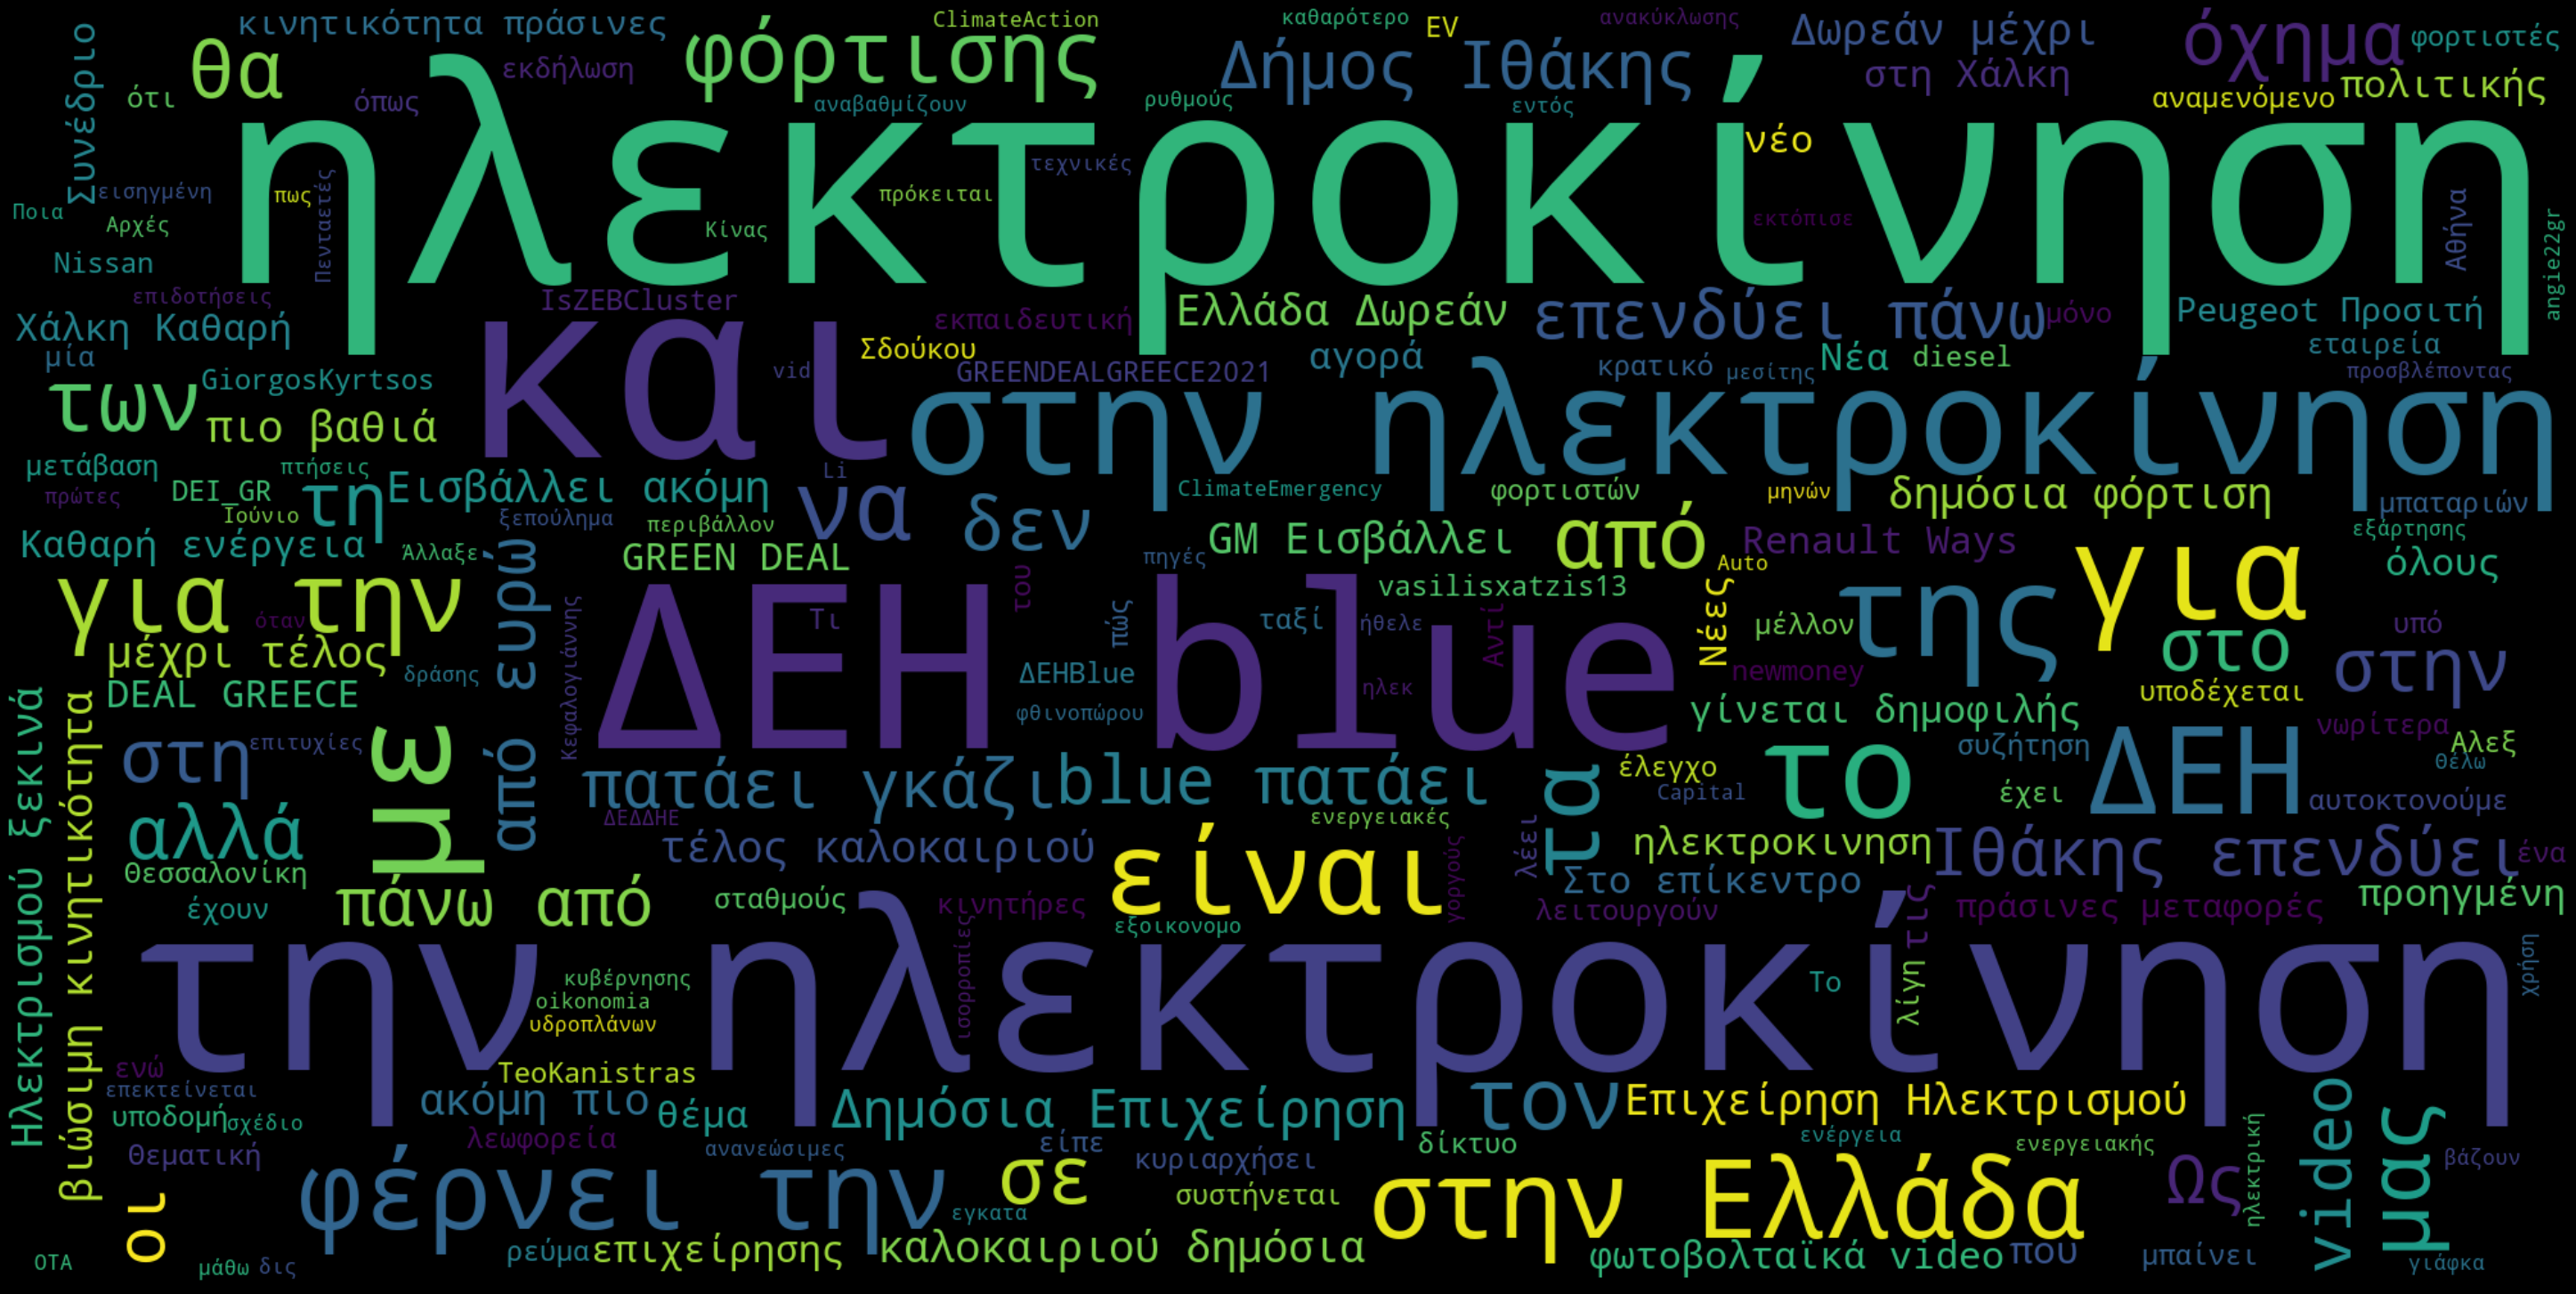

In [20]:
wordcloud = WordCloud(
#   stopwords = STOPWORDS,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(EVTweetPosts)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [21]:
import spacy

In [22]:
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [23]:
nlp = spacy.load('el_core_news_sm')

In [24]:
list(nlp.Defaults.stop_words)[0:20]

['στη',
 'βέβαια',
 'που',
 'ποιά',
 'πέρι',
 'μείον',
 'πρόπερσι',
 'άνω',
 'πρέπει',
 'οποιοδηήποτε',
 'άλλη',
 'καλώς',
 'συχνώς',
 'κατόπιν',
 'προχτές',
 'υπό',
 'έτερης',
 'μήπως',
 'ολονέν',
 'ωσάν']

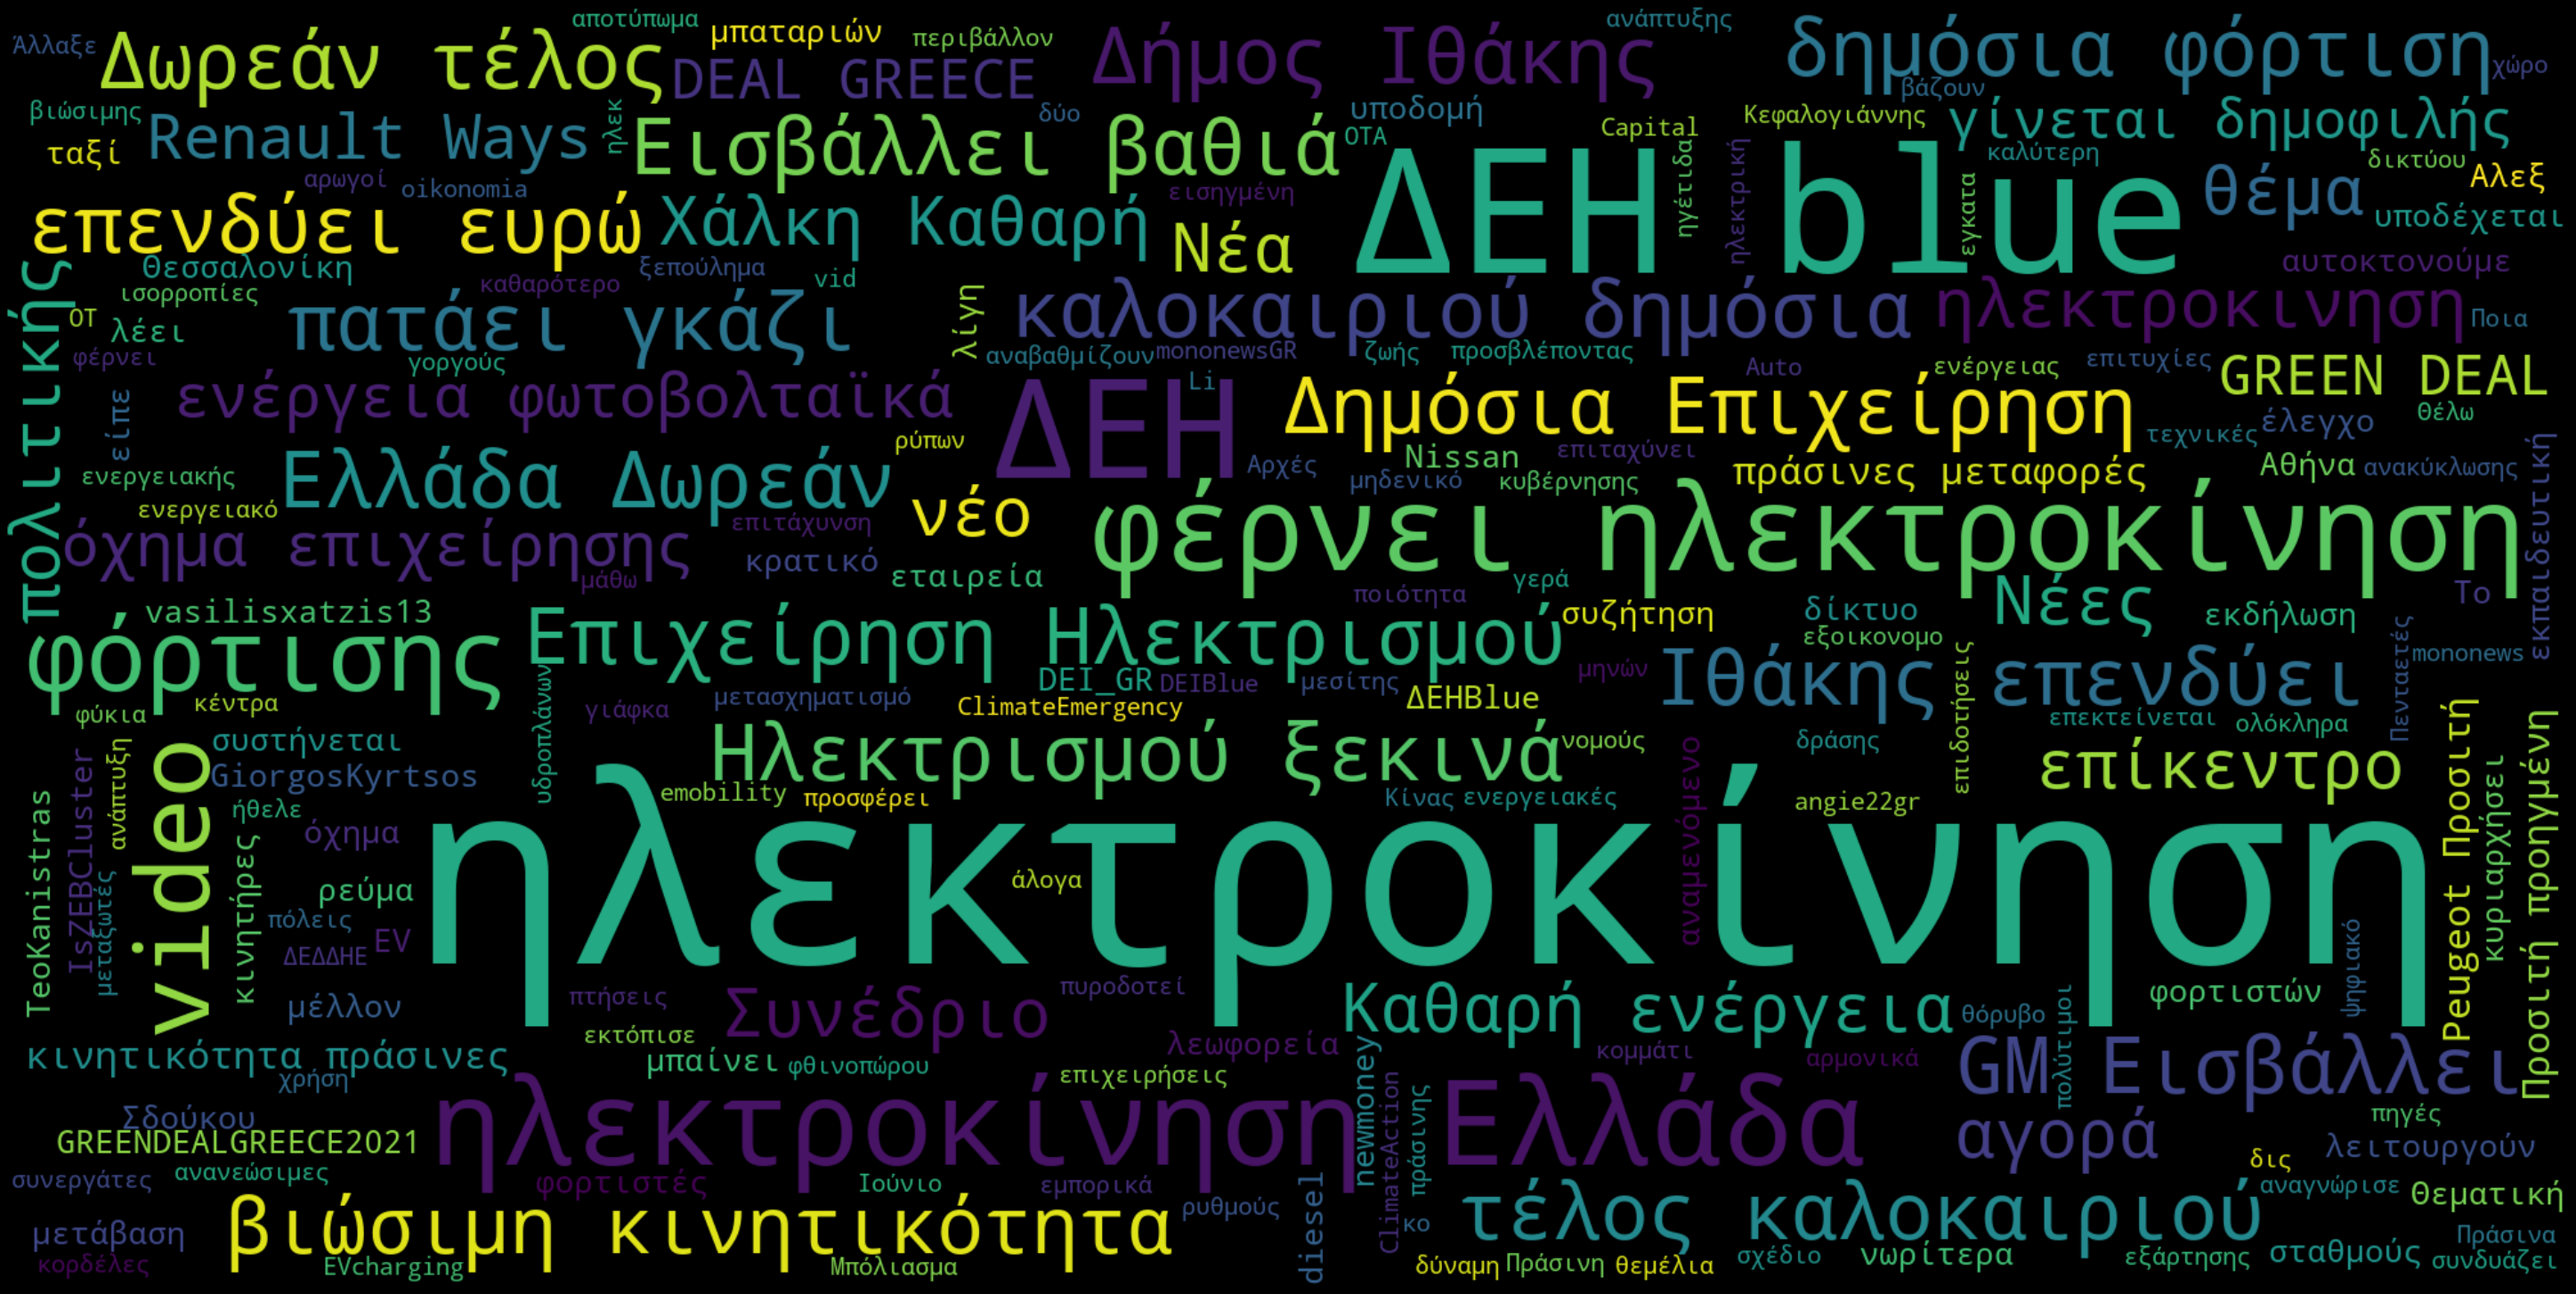

In [25]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(EVTweetPosts)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Ας βρούμε για καθε λέξη που βρίσκεται σε διαφορετικές πτώσεις στην ονομαστική και τα ρήματα στο 1ο πρόσωπο...

In [26]:
doc = nlp(EVTweets2['text'][2])

In [27]:
for token in doc:
    print(token, token.lemma_)

@angie22gr @angie22gr
Με με
τις τις
επιτυχίες επιτυχία
της της
κυβέρνησης,7 κυβέρνησης,7
δις δις
επιδοτήσεις επιδοτήσει
, ,
ηλεκτροκίνηση ηλεκτροκίνηση
, ,
ανανεώσιμες ανανεώσιμες
ενεργειακές ενεργειακός
πηγές πηγή
, ,
ηλεκτρική ηλεκτρικός
… …


In [28]:
' '.join(token.lemma_ for token in doc)

'@angie22gr με τις επιτυχία της κυβέρνησης,7 δις επιδοτήσει , ηλεκτροκίνηση , ανανεώσιμες ενεργειακός πηγή , ηλεκτρικός …'

In [29]:
EVTweetPosts

'@angie22gr Με τις επιτυχίες της κυβέρνησης,7 δις επιδοτήσεις,ηλεκτροκίνηση,ανανεώσιμες ενεργειακές πηγές,ηλεκτρική…  Δήμος Ιθάκης: Επενδύει πάνω από 600.000 ευρώ στην ηλεκτροκίνηση (vid) - newmoney  H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση  Ο μεσίτης στη γιάφκα ενεργειακής εξάρτησης δεν ήθελε σταθμούς φόρτισης από #ΔΕΔΔΗΕ(για ξεπούλημα) και βάζουν με ΟΤΑ…  H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση | Capital -#ClimateAction #ClimateEmergency…  H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση  H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση  ΔΕΗ Blue: Η Δημόσια Επιχείρηση Ηλεκτρισμού ξεκινά την ηλεκτροκίνηση  Ο Δήμος Ιθάκης επενδύει πάνω από 600.000 ευρώ στην ηλεκτροκίνηση (+video)  ΔΕΗ blue: Πενταετές σχέδιο δράσης για την ηλεκτροκίνηση\n Η ΔΕΗ μπαίνει στην ηλεκτροκίνηση με τη ΔΕΗ Blue προσβλέποντας σε δίκτυο φόρτισης 44.000 φορτιστών μέχρι το 2025  Ηλεκτροκίνηση και στη Χάλκη – Καθαρή ενέργεια από φωτοβολταϊκά (video)  Ηλεκτροκίνηση και στη Χάλκη – Καθαρή ενέργεια από φωτοβολταϊκά (video) –\x

In [30]:
full_doc = nlp(EVTweetPosts)

In [31]:
full_doc

@angie22gr Με τις επιτυχίες της κυβέρνησης,7 δις επιδοτήσεις,ηλεκτροκίνηση,ανανεώσιμες ενεργειακές πηγές,ηλεκτρική…  Δήμος Ιθάκης: Επενδύει πάνω από 600.000 ευρώ στην ηλεκτροκίνηση (vid) - newmoney  H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση  Ο μεσίτης στη γιάφκα ενεργειακής εξάρτησης δεν ήθελε σταθμούς φόρτισης από #ΔΕΔΔΗΕ(για ξεπούλημα) και βάζουν με ΟΤΑ…  H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση | Capital -#ClimateAction #ClimateEmergency…  H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση  H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση  ΔΕΗ Blue: Η Δημόσια Επιχείρηση Ηλεκτρισμού ξεκινά την ηλεκτροκίνηση  Ο Δήμος Ιθάκης επενδύει πάνω από 600.000 ευρώ στην ηλεκτροκίνηση (+video)  ΔΕΗ blue: Πενταετές σχέδιο δράσης για την ηλεκτροκίνηση
 Η ΔΕΗ μπαίνει στην ηλεκτροκίνηση με τη ΔΕΗ Blue προσβλέποντας σε δίκτυο φόρτισης 44.000 φορτιστών μέχρι το 2025  Ηλεκτροκίνηση και στη Χάλκη – Καθαρή ενέργεια από φωτοβολταϊκά (video)  Ηλεκτροκίνηση και στη Χάλκη – Καθαρή ενέργεια από φωτοβολταϊκά (video) –  Κε

Vectorization

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [33]:
count_vector = cv.fit_transform(EVTweets2['text'])

In [34]:
count_vector.shape

(103, 504)

In [35]:
# cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

000  05ojsrm6ynwn5hj  10  100  1ο  2021  ...  όπως  όραμά  όρο  όταν  ότι  όχημα
0    0                0   0    0   0     0  ...     0      0    0     0    0      0
1    1                0   0    0   0     0  ...     0      0    0     0    0      0
2    0                0   0    0   0     0  ...     0      0    0     0    0      0
3    0                0   0    0   0     0  ...     0      0    0     0    0      0
4    0                0   0    0   0     0  ...     0      0    0     0    0      0

[5 rows x 504 columns]

In [36]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [37]:
count_vector = cv.fit_transform(EVTweets2['text'])

In [38]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head(20)

000  2021  600  amp  blue  ...  φωτοβολταϊκά  φόρτιση  φόρτισης  χάλκη  όχημα
0     0     0    0    0     0  ...             0        0         0      0      0
1     1     0    1    0     0  ...             0        0         0      0      0
2     0     0    0    0     1  ...             0        0         0      0      0
3     0     0    0    0     0  ...             0        0         1      0      0
4     0     0    0    0     1  ...             0        0         0      0      0
5     0     0    0    0     1  ...             0        0         0      0      0
6     0     0    0    0     1  ...             0        0         0      0      0
7     0     0    0    0     1  ...             0        0         0      0      0
8     1     0    1    0     0  ...             0        0         0      0      0
9     0     0    0    0     1  ...             0        0         0      0      0
10    1     0    0    0     1  ...             0        0         1      0      0
11    0     0    0    0     0  ...             1        0         0      1      0
12    0     0    0    0     0  ...             1        0         0      1      0
13    0     0    0    0     0  ...             0        0         0      0      0
14    0     0    0    0     0  ...             1        0         0      1      0
15    0     0    0    0     0  ...             0        0         0      0      0
16    0     0    0    0     1  ...             0        1         0      0      0
17    0     0    0    0     1  ...             0        1         0      0      0
18    0     0    0    0     1  ...             0        1         0      0      0
19    0     0    0    0     0  ...             0        0         0      0      0

[20 rows x 101 columns]

In [39]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [40]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(EVTweets2['text'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασα', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικο', 'αλλοιώτικας', 'αφότο', 'βεβαιόταα', 'γρήγορας', 'δίχω', 'εαυτή', 'εκάστο', 'ετέρο', 'ετού', 'ετούτε', 'ευθύ', 'εχτά', 'ιδίο', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνε', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιέ', 'ποιώ', 'πολλός', 'προχθέ', 'προχτέ', 'πόσε', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'τόσε', 'όποιας', 'όσε'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


+video  ...  2021  600.000  ...  φωτοβολταϊκά  φόρτιση  χάλκη  όχημα
0       0    0     0        0  ...             0        0      0      0
1       0    0     0        1  ...             0        0      0      0
2       0    0     0        0  ...             0        0      0      0
3       0    0     0        0  ...             0        1      0      0
4       0    0     0        0  ...             0        0      0      0

[5 rows x 96 columns]

In [41]:
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(EVTweets2['text'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

000  blue  video  βαθιά  βιώσιμη  ...  προσιτή  τέλος  φέρνει  φόρτισης  όχημα
0    0     0      0      0        0  ...        0      0       0         0      0
1    1     0      0      0        0  ...        0      0       0         0      0
2    0     1      0      0        0  ...        0      0       0         0      0
3    0     0      0      0        0  ...        0      0       0         1      0
4    0     1      0      0        0  ...        0      0       0         0      0

[5 rows x 20 columns]

In [42]:
results.sum(axis =0).sort_values(ascending = False)

ηλεκτροκίνηση    90
δεη              38
blue             24
φέρνει           11
ελλάδα           11
δημόσια           8
φόρτισης          7
video             7
000               6
όχημα             5
δωρεάν            4
εισβάλλει         4
πατάει            4
δήμος             4
γκάζι             4
γίνεται           4
βιώσιμη           4
βαθιά             4
προσιτή           4
τέλος             4
dtype: int64

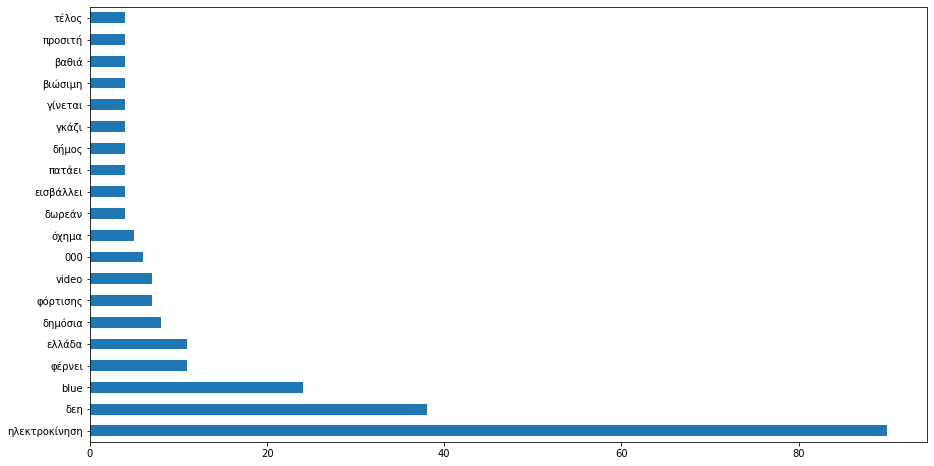

In [43]:
results.sum(axis =0).sort_values(ascending = False).head(20).plot(kind="barh", figsize=(15, 8)) 

In [44]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bηλ[α-ω-ά-ω]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(EVTweets2['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

ηλεκ  ηλεκτρική  ηλεκτρο  ...  ηλεκτροκίνησης  ηλεκτροκινηση  ηλεκτροκινητήρας
0     0          1        0  ...               0              0                 0
1     0          0        0  ...               0              0                 0
2     0          0        0  ...               0              0                 0
3     0          0        0  ...               0              0                 0
4     0          0        0  ...               0              0                 0

[5 rows x 7 columns]

In [45]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bμπα[α-ω-ά-ω]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(EVTweets2['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

μπαίνει  μπαταρίες
0        0          0
1        0          0
2        0          0
3        0          0
4        0          0

In [46]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(EVTweets2['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

000 ευρώ  blue πατάει  ...  ηλεκτροκίνηση ελλάδα  φέρνει ηλεκτροκίνηση
0         0            0  ...                     0                     0
1         1            0  ...                     0                     0
2         0            1  ...                     0                     0
3         0            0  ...                     0                     0
4         0            1  ...                     0                     0

[5 rows x 20 columns]

In [47]:
results.sum(axis =0).sort_values(ascending = False)

δεη blue                  24
φέρνει ηλεκτροκίνηση      10
ηλεκτροκίνηση ελλάδα      10
blue φέρνει                5
δεη φέρνει                 5
blue πατάει                4
βαθιά ηλεκτροκίνηση        4
βιώσιμη κινητικότητα       4
γκάζι ηλεκτροκίνηση        4
δήμος ιθάκης               4
δημόσια επιχείρηση         4
δημόσια φόρτιση            4
δωρεάν τέλος               4
εισβάλλει βαθιά            4
ελλάδα δωρεάν              4
επενδύει 600               4
επιχείρηση ηλεκτρισμού     4
ευρώ ηλεκτροκίνηση         4
ηλεκτρισμού ξεκινά         4
000 ευρώ                   4
dtype: int64

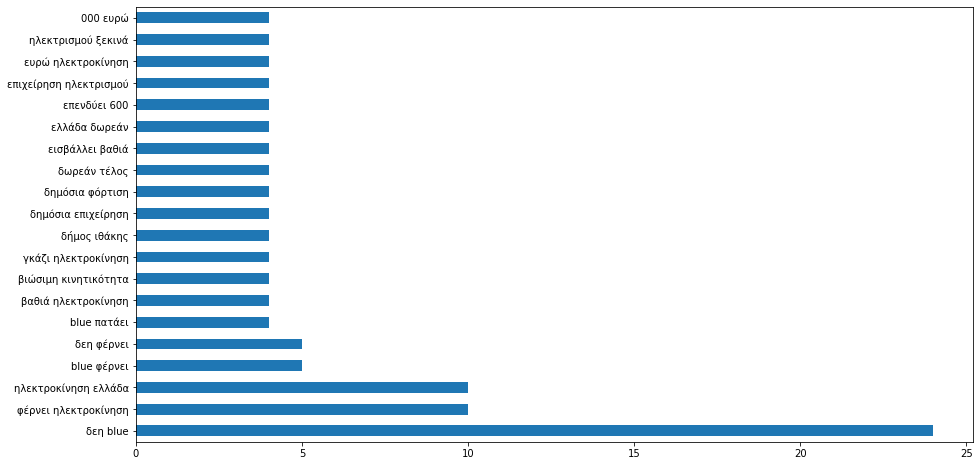

In [48]:
results.sum(axis =0).sort_values(ascending = False).head(20).plot(kind="barh", figsize=(15, 8)) 

In [48]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
 #                    token_pattern = '(\\bκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b') )\| (\\bκυβ[α-ωά-ώ]\\b) #, tokenizer=my_tokenizer)
                     token_pattern = '\\bαυτ[α-ω-ά-ω]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(EVTweets2['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

αυτοκινήτων  αυτονομία
0            0          0
1            0          0
2            0          0
3            0          0
4            0          0

In [49]:
results.sum(axis =0).sort_values(ascending = False)

αυτονομία      1
αυτοκινήτων    1
dtype: int64

Αξιοποιήστε την διανυσματοποίηση των κειμένων σας (CountVectorizer()), και τη χρήση της ομοιότητας κειμένων μέσω της συνάρτησης cosine_similarity() ώστε να βρείτε άρθρα που έχουν μεγάλη ομοιότητα. Παρουσιάστε τη συσχέτιση αυτή μέσω γραφήματος τύπου heatmap.

In [50]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['αυτονομία', 'μπαταρία', 'ηλεκτρικό', 'ηλεκτροκινητήρας', 'tesla', 'ηλεκτροκίνηση', 'υβριδικό', 'υδρογόνο', 'κινητήρας', 'καύσης', 'ΔΕΗ', 'φόρτιση']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(EVTweets2['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head(20)

αυτονομία  μπαταρία  ηλεκτρικό  ...  καύσης  ΔΕΗ  φόρτιση
0           0         0          0  ...       0    0        0
1           0         0          0  ...       0    0        0
2           0         0          0  ...       0    0        0
3           0         0          0  ...       0    0        0
4           0         0          0  ...       0    0        0
5           0         0          0  ...       0    0        0
6           0         0          0  ...       0    0        0
7           0         0          0  ...       0    0        0
8           0         0          0  ...       0    0        0
9           0         0          0  ...       0    0        0
10          0         0          0  ...       0    0        0
11          0         0          0  ...       0    0        0
12          0         0          0  ...       0    0        0
13          0         0          0  ...       0    0        0
14          0         0          0  ...       0    0        0
15          0         0          0  ...       0    0        0
16          0         0          0  ...       0    0        1
17          0         0          0  ...       0    0        1
18          0         0          0  ...       0    0        1
19          0         0          0  ...       0    0        0

[20 rows x 12 columns]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(EVTweets2['text'])  #finds the tfidf score with normalization

In [ ]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

000  05ojsrm6ynwn5hj   10  100   1ο  ...  χώρο  ψηφιακό  όραμά  όρο  όχημα
0  0.000000              0.0  0.0  0.0  0.0  ...   0.0      0.0    0.0  0.0    0.0
1  0.310866              0.0  0.0  0.0  0.0  ...   0.0      0.0    0.0  0.0    0.0
2  0.000000              0.0  0.0  0.0  0.0  ...   0.0      0.0    0.0  0.0    0.0
3  0.000000              0.0  0.0  0.0  0.0  ...   0.0      0.0    0.0  0.0    0.0
4  0.000000              0.0  0.0  0.0  0.0  ...   0.0      0.0    0.0  0.0    0.0

[5 rows x 424 columns]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.         0.00724971 0.01297126 0.         0.00794825 0.01297126
  0.01297126 0.01013824 0.00825856 0.00934447 0.00630677 0.00937366
  0.00937366 0.00663405 0.00937366 0.00662162 0.00827572 0.00827572
  0.00827572 0.00809159 0.00827572 0.00578994 0.00971177 0.00971177
  0.01700213 0.01700213 0.01013824 0.01284676 0.01013824 0.01013824
  0.0058931  0.01274824 0.00888159 0.00825856 0.00888159 0.00628533
  0.01533904 0.00910155 0.00590044 0.0106743  0.01074218 0.0106743
  0.00825856 0.00578994 0.         0.00626231 0.00613894 0.00862611
  0.00592562 0.00675132 0.00618955 0.01016776 0.00722037 0.
  0.00567533 0.00624067 0.00671093 0.         0.01025132 0.
  0.         0.         0.0068786  0.0121824  0.0121824  0.00865365
  0.00775009 0.00756243 0.01016776 0.         0.01016776 0.0102378
  0.0121824  0.00654773 0.00717467 0.00595487 0.01265357 0.00624067
  0.0066473  0.00629371 0.00581215 0.         0.00955951 0.00955951
  0.         0.0061997  0.         0.00527759 0

In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)) 

cosine scores ==>  [[1.         0.00724971 0.01297126 ... 0.01175613 0.00723838 0.0102378 ]
 [0.00724971 1.         0.01624159 ... 0.0147201  0.00906333 0.01281897]
 [0.01297126 0.01624159 1.         ... 0.02633737 0.0162162  0.02293585]
 ...
 [0.01175613 0.0147201  0.02633737 ... 1.         0.0146971  0.02078725]
 [0.00723838 0.00906333 0.0162162  ... 0.0146971  1.         0.01279894]
 [0.0102378  0.01281897 0.02293585 ... 0.02078725 0.01279894 1.        ]]


In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

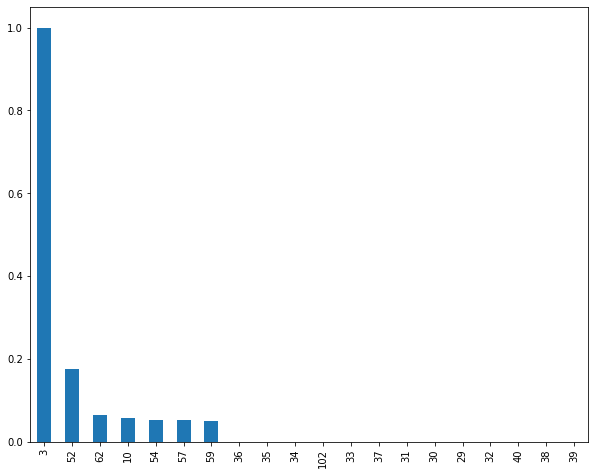

In [ ]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar', figsize = [10,8])

#6. Να πραγματοποιήσετε αναλύσεις στα αριθμητικά δεδομένα σας και να δημιουργήσετε τα αντίστοιχα γραφήματα, τα οποία δείχνουν χαρακτηριστικά και συσχετίσεις που κρύβουν τα δεδομένα σας.

Διάγραμμα με τις 20 πιο συχνές λέξεις

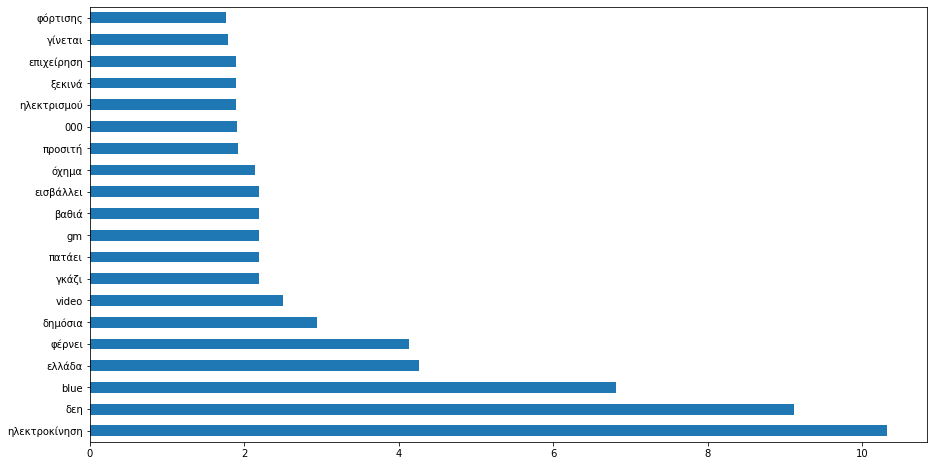

In [ ]:
results.sum(axis =0).sort_values(ascending = False).head(20).plot(kind="barh", figsize=(15, 8)) 

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(EVTweets2['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

κυβέρνηση  κυβέρνησης  κυριαρχήσει
0          0           1            0
1          0           0            0
2          0           0            0
3          0           0            0
4          0           0            0

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(EVTweets2['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

000 ευρώ  blue πατάει  ...  ηλεκτροκίνηση ελλάδα  φέρνει ηλεκτροκίνηση
0         0            0  ...                     0                     0
1         1            0  ...                     0                     0
2         0            1  ...                     0                     0
3         0            0  ...                     0                     0
4         0            1  ...                     0                     0

[5 rows x 20 columns]

In [ ]:
results.sum(axis =0).sort_values(ascending = False)

δεη blue                  24
φέρνει ηλεκτροκίνηση      10
ηλεκτροκίνηση ελλάδα      10
blue φέρνει                5
δεη φέρνει                 5
blue πατάει                4
βαθιά ηλεκτροκίνηση        4
βιώσιμη κινητικότητα       4
γκάζι ηλεκτροκίνηση        4
δήμος ιθάκης               4
δημόσια επιχείρηση         4
δημόσια φόρτιση            4
δωρεάν τέλος               4
εισβάλλει βαθιά            4
ελλάδα δωρεάν              4
επενδύει 600               4
επιχείρηση ηλεκτρισμού     4
ευρώ ηλεκτροκίνηση         4
ηλεκτρισμού ξεκινά         4
000 ευρώ                   4
dtype: int64

Διάγραμμα με τις 20 συχνότερες φράσεις

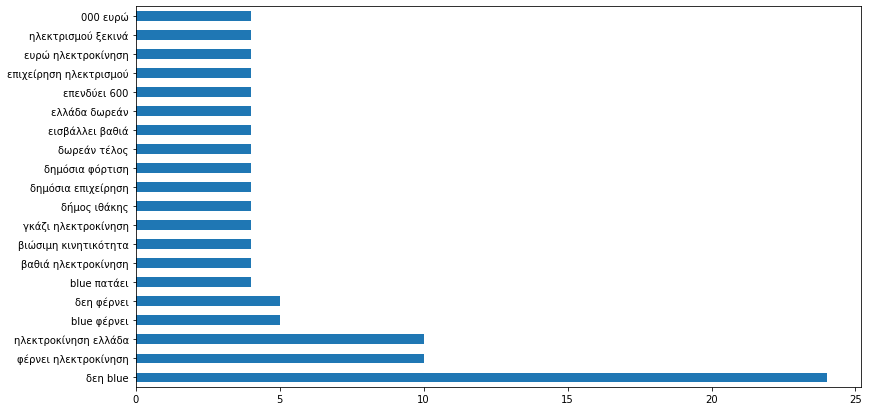

In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head(20).plot(kind="barh", figsize=(13, 7)) 

#5. Πάμε να φτιάξουμε μία νέα στήλη ημερομηνίας, ώστε να είναι μετά αξιοποιήσιμη στο index, αλλά και να προσθέσουμε νέες στήλες ξεχωριστά για μέρα, μήνα και χρονιά

In [ ]:
EVTweets2['created_at'] = pd.to_datetime(EVTweets2['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
EVTweets2

created_at                                               text
2   2021-07-03 18:55:21  @angie22gr Με τις επιτυχίες της κυβέρνησης,7 δ...
4   2021-07-03 13:55:38  Δήμος Ιθάκης: Επενδύει πάνω από 600.000 ευρώ σ...
5   2021-07-03 12:01:43        H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση 
7   2021-07-03 09:01:02  Ο μεσίτης στη γιάφκα ενεργειακής εξάρτησης δεν...
9   2021-07-03 08:58:31  H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση | C...
..                  ...                                                ...
196 2021-06-27 02:47:46  #TeoKanistras Peugeot: Προσιτή και προηγμένη η...
197 2021-06-26 16:30:54  Σκρέκας: Στόχος να αναβαθμίζονται ενεργειακά π...
198 2021-06-26 15:59:56  Peugeot: Προσιτή και προηγμένη ηλεκτροκίνηση γ...
199 2021-06-26 13:30:05  @05oJSrm6YnWN5HJ @cynaegeirus Και βυσσινί,επίσ...
200 2021-06-26 11:29:58  Άμεση μετάβαση προς την ηλεκτροκίνηση #moneyre...

[103 rows x 2 columns]

In [ ]:
EVTweets2['year'] = pd.DatetimeIndex(EVTweets2['created_at']).year
EVTweets2['month'] = pd.DatetimeIndex(EVTweets2['created_at']).month
EVTweets2['day'] = pd.DatetimeIndex(EVTweets2['created_at']).day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
EVTweets2

created_at  ... day
2   2021-07-03 18:55:21  ...   3
4   2021-07-03 13:55:38  ...   3
5   2021-07-03 12:01:43  ...   3
7   2021-07-03 09:01:02  ...   3
9   2021-07-03 08:58:31  ...   3
..                  ...  ...  ..
196 2021-06-27 02:47:46  ...  27
197 2021-06-26 16:30:54  ...  26
198 2021-06-26 15:59:56  ...  26
199 2021-06-26 13:30:05  ...  26
200 2021-06-26 11:29:58  ...  26

[103 rows x 5 columns]

In [ ]:
EVTweets2.dtypes

created_at    datetime64[ns]
text                  object
year                   int64
month                  int64
day                    int64
dtype: object

#8 Κάνω την ημερομηνία index

In [ ]:
EVTweets2.set_index('date' , inplace=True)

In [ ]:
EVTweets2

In [ ]:
dfCarAndDriver.index.month.value_counts().sort_values(axis=0, ascending=False).plot(kind = 'bar', figsize = [10,8])

In [ ]:
dfCarAndDriver[dfCarAndDriver.index.month == 7]

#9	Κάνοντας χρήση του ελληνικού λεξικού για sentiment anaysis του NRC βρείτε την πολικότητα (θετική - αρνητική) και τα συναισθήματα των κειμένων σας, και αποθηκεύστε τα σε νέες στήλες στο dataframe των δεδομένων σας.

In [ ]:
import spacy
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
EVTweetPosts = EVTweets2['text'].str.cat(sep = ' ').replace("amp", '')

In [ ]:
EVTweetPosts

'@angie22gr Με τις επιτυχίες της κυβέρνησης,7 δις επιδοτήσεις,ηλεκτροκίνηση,ανανεώσιμες ενεργειακές πηγές,ηλεκτρική…  Δήμος Ιθάκης: Επενδύει πάνω από 600.000 ευρώ στην ηλεκτροκίνηση (vid) - newmoney  H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση  Ο μεσίτης στη γιάφκα ενεργειακής εξάρτησης δεν ήθελε σταθμούς φόρτισης από #ΔΕΔΔΗΕ(για ξεπούλημα) και βάζουν με ΟΤΑ…  H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση | Capital -#ClimateAction #ClimateEmergency…  H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση  H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση  ΔΕΗ Blue: Η Δημόσια Επιχείρηση Ηλεκτρισμού ξεκινά την ηλεκτροκίνηση  Ο Δήμος Ιθάκης επενδύει πάνω από 600.000 ευρώ στην ηλεκτροκίνηση (+video)  ΔΕΗ blue: Πενταετές σχέδιο δράσης για την ηλεκτροκίνηση\n Η ΔΕΗ μπαίνει στην ηλεκτροκίνηση με τη ΔΕΗ Blue προσβλέποντας σε δίκτυο φόρτισης 44.000 φορτιστών μέχρι το 2025  Ηλεκτροκίνηση και στη Χάλκη – Καθαρή ενέργεια από φωτοβολταϊκά (video)  Ηλεκτροκίνηση και στη Χάλκη – Καθαρή ενέργεια από φωτοβολταϊκά (video) –\x

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
list(nlp.Defaults.stop_words)[0:10]

['αν',
 'κάποιος',
 'μπορούν',
 'πρώτα',
 'ανάμεσα',
 'κάποια',
 'μόλις',
 'πλην',
 'κάποτε',
 'αι']

In [ ]:
TweetDoc = nlp(EVTweets2['text'][2])

In [ ]:
TweetDoc

@angie22gr Με τις επιτυχίες της κυβέρνησης,7 δις επιδοτήσεις,ηλεκτροκίνηση,ανανεώσιμες ενεργειακές πηγές,ηλεκτρική… 

In [ ]:
for token in TweetDoc:
    print(token, token.lemma_)

@angie22gr @angie22gr
Με με
τις τις
επιτυχίες επιτυχία
της της
κυβέρνησης,7 κυβέρνησης,7
δις δις
επιδοτήσεις επιδοτήσει
, ,
ηλεκτροκίνηση ηλεκτροκίνηση
, ,
ανανεώσιμες ανανεώσιμες
ενεργειακές ενεργειακός
πηγές πηγή
, ,
ηλεκτρική ηλεκτρικός
… …


In [ ]:
EVTweetPosts

'@angie22gr Με τις επιτυχίες της κυβέρνησης,7 δις επιδοτήσεις,ηλεκτροκίνηση,ανανεώσιμες ενεργειακές πηγές,ηλεκτρική…  Δήμος Ιθάκης: Επενδύει πάνω από 600.000 ευρώ στην ηλεκτροκίνηση (vid) - newmoney  H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση  Ο μεσίτης στη γιάφκα ενεργειακής εξάρτησης δεν ήθελε σταθμούς φόρτισης από #ΔΕΔΔΗΕ(για ξεπούλημα) και βάζουν με ΟΤΑ…  H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση | Capital -#ClimateAction #ClimateEmergency…  H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση  H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση  ΔΕΗ Blue: Η Δημόσια Επιχείρηση Ηλεκτρισμού ξεκινά την ηλεκτροκίνηση  Ο Δήμος Ιθάκης επενδύει πάνω από 600.000 ευρώ στην ηλεκτροκίνηση (+video)  ΔΕΗ blue: Πενταετές σχέδιο δράσης για την ηλεκτροκίνηση\n Η ΔΕΗ μπαίνει στην ηλεκτροκίνηση με τη ΔΕΗ Blue προσβλέποντας σε δίκτυο φόρτισης 44.000 φορτιστών μέχρι το 2025  Ηλεκτροκίνηση και στη Χάλκη – Καθαρή ενέργεια από φωτοβολταϊκά (video)  Ηλεκτροκίνηση και στη Χάλκη – Καθαρή ενέργεια από φωτοβολταϊκά (video) –\x

In [ ]:
' '.join(token.lemma_ for token in TweetDoc)

'@angie22gr με τις επιτυχία της κυβέρνησης,7 δις επιδοτήσει , ηλεκτροκίνηση , ανανεώσιμες ενεργειακός πηγή , ηλεκτρικός …'

In [ ]:
TweetFull = nlp(EVTweetPosts)

In [ ]:
TweetClear = ' '.join(token.lemma_ for token in TweetFull)

In [ ]:
TweetClear

'@angie22gr με τις επιτυχία της κυβέρνησης,7 δις επιδοτήσει , ηλεκτροκίνηση , ανανεώσιμες ενεργειακός πηγή , ηλεκτρικός …   δήμος ιθάκης : επενδύω πάνω από 600.000 ευρώ στην ηλεκτροκίνηση ( vid ) - newmoney   h δεη blue πατάω γκάζι στην ηλεκτροκίνηση   ο μεσίτης στη γιάφκα ενεργειακός εξάρτηση δεν ήθελε σταθμούς φόρτιση από # δεδδηε(για ξεπούλημα ) και βάζω με οτας …   h δεη blue πατάω γκάζι στην ηλεκτροκίνηση | capital -#climateaction # climateemergency …   h δεη blue πατάω γκάζι στην ηλεκτροκίνηση   h δεη blue πατάω γκάζι στην ηλεκτροκίνηση   δεη blue : η δημόσιος επιχείρηση ηλεκτρισμός ξεκινά την ηλεκτροκίνηση   ο δήμος ιθάκης επενδύω πάνω από 600.000 ευρώ στην ηλεκτροκίνηση ( +video )   δεη blue : πενταετής σχέδιο δράση για την ηλεκτροκίνηση \n  η δεη μπαίνω στην ηλεκτροκίνηση με τη δεη blue προσβλέποντα σε δίκτυο φόρτιση 44.000 φορτιστής μέχρι το 2025   ηλεκτροκίνηση και στη Χάλκη – καθαρή ενέργεια από φωτοβολταϊκά ( video )   ηλεκτροκίνηση και στη Χάλκη – καθαρή ενέργεια από φωτο

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
count_vector = cv.fit_transform(EVTweets2['text'])

In [ ]:
count_vector.shape

(103, 504)

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

000  05ojsrm6ynwn5hj  10  100  1ο  2021  ...  όπως  όραμά  όρο  όταν  ότι  όχημα
0    0                0   0    0   0     0  ...     0      0    0     0    0      0
1    1                0   0    0   0     0  ...     0      0    0     0    0      0
2    0                0   0    0   0     0  ...     0      0    0     0    0      0
3    0                0   0    0   0     0  ...     0      0    0     0    0      0
4    0                0   0    0   0     0  ...     0      0    0     0    0      0

[5 rows x 504 columns]

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [ ]:
count_vector = cv.fit_transform(EVTweets2['text'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head(20)

000  2021  600  amp  blue  ...  φωτοβολταϊκά  φόρτιση  φόρτισης  χάλκη  όχημα
0     0     0    0    0     0  ...             0        0         0      0      0
1     1     0    1    0     0  ...             0        0         0      0      0
2     0     0    0    0     1  ...             0        0         0      0      0
3     0     0    0    0     0  ...             0        0         1      0      0
4     0     0    0    0     1  ...             0        0         0      0      0
5     0     0    0    0     1  ...             0        0         0      0      0
6     0     0    0    0     1  ...             0        0         0      0      0
7     0     0    0    0     1  ...             0        0         0      0      0
8     1     0    1    0     0  ...             0        0         0      0      0
9     0     0    0    0     1  ...             0        0         0      0      0
10    1     0    0    0     1  ...             0        0         1      0      0
11    0     0    0    0     0  ...             1        0         0      1      0
12    0     0    0    0     0  ...             1        0         0      1      0
13    0     0    0    0     0  ...             0        0         0      0      0
14    0     0    0    0     0  ...             1        0         0      1      0
15    0     0    0    0     0  ...             0        0         0      0      0
16    0     0    0    0     1  ...             0        1         0      0      0
17    0     0    0    0     1  ...             0        1         0      0      0
18    0     0    0    0     1  ...             0        1         0      0      0
19    0     0    0    0     0  ...             0        0         0      0      0

[20 rows x 101 columns]

In [ ]:
from html import unescape
def my_tokenizer(TweetDoc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(TweetDoc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [ ]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(EVTweets2['text'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικο', 'αλλοιώτικο', 'αφότο', 'βεβαιότατας', 'γρήγορο', 'δίχω', 'εαυτός', 'εκάστο', 'ετέρο', 'ετού', 'ευθύ', 'εχτής', 'ιδίο', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιής', 'ποιώ', 'πολλός', 'προχθής', 'προχτά', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'ταύτε', 'ταύτο', 'όποιας'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


+video  ...  2021  600.000  ...  φωτοβολταϊκά  φόρτιση  χάλκη  όχημα
0       0    0     0        0  ...             0        0      0      0
1       0    0     0        1  ...             0        0      0      0
2       0    0     0        0  ...             0        0      0      0
3       0    0     0        0  ...             0        1      0      0
4       0    0     0        0  ...             0        0      0      0

[5 rows x 96 columns]

In [ ]:
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(EVTweets2['text'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικο', 'αλλοιώτικο', 'αφότο', 'βεβαιότατας', 'γρήγορο', 'δίχω', 'εαυτός', 'εκάστο', 'ετέρο', 'ετού', 'ευθύ', 'εχτής', 'ιδίο', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιής', 'ποιώ', 'πολλός', 'προχθής', 'προχτά', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'ταύτε', 'ταύτο', 'όποιας'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


blue  video  γίνομαι  δεη  δημόσιος  ...  νέος  φέρνω  φορτιστής  φόρτιση  όχημα
0     0      0        0    0         0  ...     0      0          0        0      0
1     0      0        0    0         0  ...     0      0          0        0      0
2     1      0        0    1         0  ...     0      0          0        0      0
3     0      0        0    0         0  ...     0      0          0        1      0
4     1      0        0    1         0  ...     0      0          0        0      0

[5 rows x 20 columns]

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bηλ[α-ωά-ώ]*\\b', tokenizer=my_tokenizer)
count_vector = cv.fit_transform(EVTweets2['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικο', 'αλλοιώτικο', 'αφότο', 'βεβαιότατας', 'γρήγορο', 'δίχω', 'εαυτός', 'εκάστο', 'ετέρο', 'ετού', 'ευθύ', 'εχτής', 'ιδίο', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιής', 'ποιώ', 'πολλός', 'προχθής', 'προχτά', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'ταύτε', 'ταύτο', 'όποιας'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


blue  video  γίνομαι  δεη  δημόσιος  ...  νέος  φέρνω  φορτιστής  φόρτιση  όχημα
0     0      0        0    0         0  ...     0      0          0        0      0
1     0      0        0    0         0  ...     0      0          0        0      0
2     1      0        0    1         0  ...     0      0          0        0      0
3     0      0        0    0         0  ...     0      0          0        1      0
4     1      0        0    1         0  ...     0      0          0        0      0

[5 rows x 20 columns]

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2), token_pattern = '\\bηλ[α-ωά-ώ]*\\b', tokenizer=my_tokenizer)
count_vector = cv.fit_transform(EVTweets2['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικο', 'αλλοιώτικο', 'αφότο', 'βεβαιότατας', 'γρήγορο', 'δίχω', 'εαυτός', 'εκάστο', 'ετέρο', 'ετού', 'ευθύ', 'εχτής', 'ιδίο', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιής', 'ποιώ', 'πολλός', 'προχθής', 'προχτά', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'ταύτε', 'ταύτο', 'όποιας'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


blue φέρνω  βαθιά ηλεκτροκίνηση  ...  πατάω γκάζι  φέρνω ηλεκτροκίνηση
0           0                    0  ...            0                    0
1           0                    0  ...            0                    0
2           0                    0  ...            1                    0
3           0                    0  ...            0                    0
4           0                    0  ...            1                    0

[5 rows x 20 columns]

In [ ]:
results.sum(axis =0).sort_values(ascending = False)

δεη blue                  24
φέρνω ηλεκτροκίνηση       10
ηλεκτροκίνηση ελλάδα      10
δεη φέρνω                  5
blue φέρνω                 5
ευρώ ηλεκτροκίνηση         4
επιχείρηση ηλεκτρισμός     4
επενδύω 600.000            4
ελλάδα δωρεώ               4
εισβάλλω βαθιά             4
πατάω γκάζι                4
δημόσιος φόρτιση           4
δημόσιος επιχείρηση        4
ηλεκτρισμός ξεκινά         4
ξεκινά ηλεκτροκίνηση       4
δήμος ιθάκης               4
γκάζι ηλεκτροκίνηση        4
βιώσιμη κινητικότητα       4
βαθιά ηλεκτροκίνηση        4
δωρεώ τέλος                4
dtype: int64

In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head(17)   

δεη blue                  24
φέρνω ηλεκτροκίνηση       10
ηλεκτροκίνηση ελλάδα      10
δεη φέρνω                  5
blue φέρνω                 5
ευρώ ηλεκτροκίνηση         4
επιχείρηση ηλεκτρισμός     4
επενδύω 600.000            4
ελλάδα δωρεώ               4
εισβάλλω βαθιά             4
πατάω γκάζι                4
δημόσιος φόρτιση           4
δημόσιος επιχείρηση        4
ηλεκτρισμός ξεκινά         4
ξεκινά ηλεκτροκίνηση       4
δήμος ιθάκης               4
γκάζι ηλεκτροκίνηση        4
dtype: int64

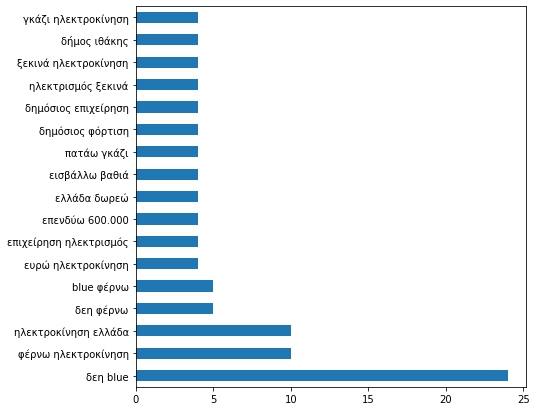

In [ ]:
sum_words.sort_values(ascending = False).head(17).plot(kind = 'barh', figsize=(7,7))

In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  ...  Joy  Sadness  Surprise  Trust
0            αφεση       1.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
1  ενορκη βεβαιωση       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
2          εχοντας       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
3              εχω       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
4             οριο       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 11 columns]

In [ ]:
emolex_df.tail()

word  Positive  Negative  Anger  ...  Joy  Sadness  Surprise  Trust
13166     ουρλιασμα       0.0       1.0    1.0  ...  0.0      0.0       1.0    0.0
13167  κροκος αυγου       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13168      νεοτερος       1.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13169       ζεφυρος       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13170          ζουμ       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 11 columns]

In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [ ]:
emolex_df.tail()

index          word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
13156  13166     ουρλιασμα       0.0       1.0  ...  0.0      0.0       1.0    0.0
13157  13167  κροκος αυγου       0.0       0.0  ...  0.0      0.0       0.0    0.0
13158  13168      νεοτερος       1.0       0.0  ...  0.0      0.0       0.0    0.0
13159  13169       ζεφυρος       0.0       0.0  ...  0.0      0.0       0.0    0.0
13160  13170          ζουμ       0.0       0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 12 columns]

In [ ]:
nlp = spacy.load("el_core_news_sm")

In [ ]:
EVTweets2

created_at  ... day
2   2021-07-03 18:55:21  ...   3
4   2021-07-03 13:55:38  ...   3
5   2021-07-03 12:01:43  ...   3
7   2021-07-03 09:01:02  ...   3
9   2021-07-03 08:58:31  ...   3
..                  ...  ...  ..
196 2021-06-27 02:47:46  ...  27
197 2021-06-26 16:30:54  ...  26
198 2021-06-26 15:59:56  ...  26
199 2021-06-26 13:30:05  ...  26
200 2021-06-26 11:29:58  ...  26

[103 rows x 5 columns]

In [ ]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [ ]:
EVTweets2['text'] = EVTweets2['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# Θέλω να ελέγξω μόνο τις λέξεις που υπάρχουν στο συναισθηματικό λεξικό

#CountVectorizer(analyzer = 'word', 
                #strip_accents = 'unicode', 
                #token_pattern='[Α-Ωα-ωΆ-Ώά-ώ]{2,}', 
                #stop_words= lc_stop_words_df['stop_w'].tolist())


matrix = vec.fit_transform(EVTweets2['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε', 

αφεση  ενορκη βεβαιωση  εχοντας  εχω  ...  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ
0      0                0        0    0  ...             0         0        0     0
1      0                0        0    0  ...             0         0        0     0
2      0                0        0    0  ...             0         0        0     0
3      0                0        0    0  ...             0         0        0     0
4      0                0        0    0  ...             0         0        0     0

[5 rows x 13161 columns]

In [ ]:
wordcount_df.shape

(103, 13161)

In [ ]:
emolex_df.head()

index             word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
0      0            αφεση       1.0       0.0  ...  0.0      0.0       0.0    0.0
1      1  ενορκη βεβαιωση       0.0       0.0  ...  0.0      0.0       0.0    0.0
2      2          εχοντας       0.0       0.0  ...  0.0      0.0       0.0    0.0
3      3              εχω       0.0       0.0  ...  0.0      0.0       0.0    0.0
4      4             οριο       0.0       0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 12 columns]

In [ ]:
emolex_df[emolex_df.Anger == 1].tail()

index          word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
13094  13104      διεξοδος       0.0       0.0  ...  0.0      0.0       0.0    0.0
13096  13106        ζωυφια       0.0       1.0  ...  0.0      0.0       0.0    0.0
13100  13110    θυματοποιω       0.0       1.0  ...  0.0      1.0       1.0    0.0
13128  13138  αποτυχημενος       0.0       1.0  ...  0.0      0.0       0.0    0.0
13156  13166     ουρλιασμα       0.0       1.0  ...  0.0      0.0       1.0    0.0

[5 rows x 12 columns]

In [ ]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [ ]:
EVTweets2.head(3)

created_at  ... day
2 2021-07-03 18:55:21  ...   3
4 2021-07-03 13:55:38  ...   3
5 2021-07-03 12:01:43  ...   3

[3 rows x 5 columns]

In [ ]:
EVTweets2['anger'] = wordcount_df[angry_words].sum(axis=1)

EVTweets2['positivity'] = wordcount_df[positive_words].sum(axis=1)

EVTweets2['joy'] = wordcount_df[joy_words].sum(axis=1)

EVTweets2['disgust'] = wordcount_df[disgust_words].sum(axis=1)

EVTweets2['surprise'] = wordcount_df[surprise_words].sum(axis=1)

EVTweets2['trust'] = wordcount_df[trust_words].sum(axis=1)

EVTweets2['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

EVTweets2['sadness'] = wordcount_df[sadness_words].sum(axis=1)

EVTweets2['negative'] = wordcount_df[negative_words].sum(axis=1)

EVTweets2['fear'] = wordcount_df[fear_words].sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [ ]:
pd.set_option('display.max_rows', 110)

In [ ]:
EVTweets2

created_at  ... fear
2   2021-07-03 18:55:21  ...  0.0
4   2021-07-03 13:55:38  ...  0.0
5   2021-07-03 12:01:43  ...  0.0
7   2021-07-03 09:01:02  ...  0.0
9   2021-07-03 08:58:31  ...  0.0
10  2021-07-03 08:57:38  ...  0.0
13  2021-07-03 08:41:32  ...  0.0
15  2021-07-03 07:30:28  ...  0.0
20  2021-07-02 17:52:59  ...  0.0
21  2021-07-02 17:17:57  ...  0.0
22  2021-07-02 17:05:17  ...  0.0
23  2021-07-02 15:31:33  ...  0.0
24  2021-07-02 14:42:18  ...  0.0
25  2021-07-02 14:39:24  ...  0.0
26  2021-07-02 14:32:26  ...  0.0
33  2021-07-02 14:25:51  ...  0.0
36  2021-07-02 12:38:07  ...  0.0
37  2021-07-02 12:30:07  ...  0.0
38  2021-07-02 12:18:44  ...  0.0
39  2021-07-02 11:09:03  ...  0.0
40  2021-07-02 10:46:04  ...  0.0
41  2021-07-02 09:53:19  ...  0.0
42  2021-07-02 09:46:36  ...  0.0
43  2021-07-02 09:29:45  ...  1.0
44  2021-07-02 09:15:24  ...  0.0
45  2021-07-02 08:48:34  ...  0.0
46  2021-07-02 08:36:44  ...  0.0
48  2021-07-02 08:03:54  ...  1.0
50  2021-07-02 07:15:05  ...  0.0
51  2021-07-02 07:08:40  ...  0.0
52  2021-07-02 06:58:15  ...  1.0
53  2021-07-02 00:28:39  ...  0.0
54  2021-07-01 23:23:41  ...  0.0
56  2021-07-01 22:14:07  ...  0.0
57  2021-07-01 21:18:04  ...  0.0
59  2021-07-01 20:30:25  ...  0.0
60  2021-07-01 20:30:09  ...  0.0
61  2021-07-01 19:21:33  ...  0.0
63  2021-07-01 19:06:57  ...  1.0
64  2021-07-01 18:51:05  ...  1.0
65  2021-07-01 18:46:47  ...  0.0
66  2021-07-01 18:32:37  ...  0.0
68  2021-07-01 16:29:02  ...  0.0
69  2021-07-01 15:57:11  ...  0.0
70  2021-07-01 15:50:58  ...  0.0
71  2021-07-01 15:45:34  ...  0.0
73  2021-07-01 15:39:09  ...  0.0
74  2021-07-01 15:36:53  ...  0.0
75  2021-07-01 15:32:03  ...  0.0
76  2021-07-01 15:31:39  ...  0.0
87  2021-07-01 14:53:31  ...  1.0
98  2021-07-01 12:47:13  ...  0.0
99  2021-07-01 11:34:59  ...  0.0
100 2021-07-01 11:33:09  ...  0.0
101 2021-07-01 10:16:08  ...  1.0
102 2021-07-01 08:37:32  ...  0.0
103 2021-07-01 07:12:12  ...  NaN
104 2021-07-01 07:06:12  ...  NaN
105 2021-07-01 06:59:37  ...  NaN
106 2021-07-01 06:56:28  ...  NaN
107 2021-07-01 06:48:51  ...  NaN
108 2021-07-01 06:31:32  ...  NaN
109 2021-07-01 02:56:03  ...  NaN
110 2021-06-30 22:58:10  ...  NaN
111 2021-06-30 18:15:14  ...  NaN
112 2021-06-30 17:21:33  ...  NaN
113 2021-06-30 13:45:57  ...  NaN
114 2021-06-30 12:21:04  ...  NaN
115 2021-06-30 12:14:06  ...  NaN
117 2021-06-30 12:02:19  ...  NaN
118 2021-06-30 11:55:36  ...  NaN
119 2021-06-30 06:05:00  ...  NaN
122 2021-06-29 22:17:28  ...  NaN
125 2021-06-29 18:53:21  ...  NaN
134 2021-06-29 16:21:03  ...  NaN
135 2021-06-29 15:56:58  ...  NaN
138 2021-06-29 14:48:06  ...  NaN
141 2021-06-29 14:12:42  ...  NaN
142 2021-06-29 13:53:43  ...  NaN
143 2021-06-29 13:48:33  ...  NaN
144 2021-06-29 13:48:12  ...  NaN
155 2021-06-29 08:34:21  ...  NaN
156 2021-06-29 05:30:24  ...  NaN
157 2021-06-29 05:07:39  ...  NaN
170 2021-06-28 21:25:12  ...  NaN
174 2021-06-28 19:33:28  ...  NaN
178 2021-06-28 18:12:35  ...  NaN
181 2021-06-28 15:26:45  ...  NaN
184 2021-06-28 13:25:41  ...  NaN
185 2021-06-28 11:54:12  ...  NaN
186 2021-06-28 10:47:22  ...  NaN
187 2021-06-28 10:03:01  ...  NaN
188 2021-06-28 08:42:04  ...  NaN
189 2021-06-28 07:43:36  ...  NaN
191 2021-06-28 06:18:34  ...  NaN
192 2021-06-28 06:00:45  ...  NaN
193 2021-06-27 17:25:46  ...  NaN
195 2021-06-27 10:00:09  ...  NaN
196 2021-06-27 02:47:46  ...  NaN
197 2021-06-26 16:30:54  ...  NaN
198 2021-06-26 15:59:56  ...  NaN
199 2021-06-26 13:30:05  ...  NaN
200 2021-06-26 11:29:58  ...  NaN

[103 rows x 15 columns]

In [ ]:
EVTweets2.set_index('created_at', inplace=True)

In [ ]:
EVTweets2

text  ...  fear
created_at                                                              ...      
2021-07-03 18:55:21  @angie22gr Με τις επιτυχίες της κυβέρνησης,7 δ...  ...   0.0
2021-07-03 13:55:38  Δήμος Ιθάκης: Επενδύει πάνω από 600.000 ευρώ σ...  ...   0.0
2021-07-03 12:01:43        H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση   ...   0.0
2021-07-03 09:01:02  Ο μεσίτης στη γιάφκα ενεργειακής εξάρτησης δεν...  ...   0.0
2021-07-03 08:58:31  H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση | C...  ...   0.0
2021-07-03 08:57:38        H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση   ...   0.0
2021-07-03 08:41:32        H ΔΕΗ blue πατάει γκάζι στην ηλεκτροκίνηση   ...   0.0
2021-07-03 07:30:28  ΔΕΗ Blue: Η Δημόσια Επιχείρηση Ηλεκτρισμού ξεκ...  ...   0.0
2021-07-02 17:52:59  Ο Δήμος Ιθάκης επενδύει πάνω από 600.000 ευρώ ...  ...   0.0
2021-07-02 17:17:57  ΔΕΗ blue: Πενταετές σχέδιο δράσης για την ηλεκ...  ...   0.0
2021-07-02 17:05:17  Η ΔΕΗ μπαίνει στην ηλεκτροκίνηση με τη ΔΕΗ Blu...  ...   0.0
2021-07-02 15:31:33  Ηλεκτροκίνηση και στη Χάλκη – Καθαρή ενέργεια ...  ...   0.0
2021-07-02 14:42:18  Ηλεκτροκίνηση και στη Χάλκη – Καθαρή ενέργεια ...  ...   0.0
2021-07-02 14:39:24  Κεφαλογιάννης: Αρχές φθινοπώρου οι πρώτες πτήσ...  ...   0.0
2021-07-02 14:32:26  Ηλεκτροκίνηση και στη Χάλκη – Καθαρή ενέργεια ...  ...   0.0
2021-07-02 14:25:51  Με γοργούς ρυθμούς επεκτείνεται το δίκτυο φορτ...  ...   0.0
2021-07-02 12:38:07  H ΔΕΗ blue φέρνει την ηλεκτροκίνηση στην Ελλάδ...  ...   0.0
2021-07-02 12:30:07  H ΔΕΗ blue φέρνει την ηλεκτροκίνηση στην Ελλάδ...  ...   0.0
2021-07-02 12:18:44  H ΔΕΗ blue φέρνει την ηλεκτροκίνηση στην Ελλάδ...  ...   0.0
2021-07-02 11:09:03  Νέες τεχνικές ανακύκλωσης των μπαταριών αναβαθ...  ...   0.0
2021-07-02 10:46:04  H ΔΕΗ blue φέρνει την ηλεκτροκίνηση στην Ελλάδ...  ...   0.0
2021-07-02 09:53:19  Άλλαξε τις ισορροπίες στην ηλεκτροκίνηση της Κ...  ...   0.0
2021-07-02 09:46:36  Αλεξ. Σδούκου: Στο επίκεντρο της πολιτικής μας...  ...   0.0
2021-07-02 09:29:45  Αλεξ. Σδούκου: Στο επίκεντρο της πολιτικής μας...  ...   1.0
2021-07-02 09:15:24    Η ΔΕΗ φέρνει την ηλεκτροκίνηση στην Ελλάδα \n\n  ...   0.0
2021-07-02 08:48:34        Η ΔΕΗ φέρνει την ηλεκτροκίνηση στην Ελλάδα   ...   0.0
2021-07-02 08:36:44  ΔΕΗ Blue: Η Δημόσια Επιχείρηση Ηλεκτρισμού ξεκ...  ...   0.0
2021-07-02 08:03:54  ΔΕΗ blue: Η ΔΕΗ φέρνει την ηλεκτροκίνηση στην ...  ...   1.0
2021-07-02 07:15:05  ΔΕΗ Blue: Η Δημόσια Επιχείρηση Ηλεκτρισμού ξεκ...  ...   0.0
2021-07-02 07:08:40  ΔΕΗ Blue: Η Δημόσια Επιχείρηση Ηλεκτρισμού ξεκ...  ...   0.0
2021-07-02 06:58:15  @DEI_GR Θέλω να μάθω πως η ηλεκτροκίνηση είναι...  ...   1.0
2021-07-02 00:28:39  Η ΔΕΗ μπαίνει στην ηλεκτροκίνηση μέσω της ΔΕΗ ...  ...   0.0
2021-07-01 23:23:41  Ως «ΔΕΗ BLUE» μας συστήνεται η υπό κρατικό έλε...  ...   0.0
2021-07-01 22:14:07  Ο Δήμος Ιθάκης επενδύει πάνω από 600.000 ευρώ ...  ...   0.0
2021-07-01 21:18:04  Ως «ΔΕΗ BLUE» μας συστήνεται η υπό κρατικό έλε...  ...   0.0
2021-07-01 20:30:25  ΔΕΗ blue: Η ΔΕΗ φέρνει την ηλεκτροκίνηση στην ...  ...   0.0
2021-07-01 20:30:09    ΔΕΗ blue: Φέρνει την ηλεκτροκίνηση στην Ελλάδα   ...   0.0
2021-07-01 19:21:33  ΔΕΗ blue: Tο «όχημα» της επιχείρησης για την ε...  ...   0.0
2021-07-01 19:06:57  1) Μπόλιασμα\n2) Ηλεκτροκίνηση\n3) Πράσινη Ενέ...  ...   1.0
2021-07-01 18:51:05  ΔΕΗ BLUE: Tο «όχημα» της επιχείρησης στην ηλεκ...  ...   1.0
2021-07-01 18:46:47  ΔΕΗ: Με "όχημα" τη ΔΕΗ blue επιταχύνει την ηλε...  ...   0.0
2021-07-01 18:32:37  ΔΕΗ BLUE: Αυτό είναι το «όχημα» της επιχείρηση...  ...   0.0
2021-07-01 16:29:02  Ο Δήμος Ιθάκης επενδύει πάνω από 600.000 ευρώ ...  ...   0.0
2021-07-01 15:57:11  H #ηλεκτροκίνηση θα μας προσφέρει καλύτερη ποι...  ...   0.0
2021-07-01 15:50:58  Στην ανάπτυξη του δικτύου της #ΔΕΗBlue πολύτιμ...  ...   0.0
2021-07-01 15:45:34  Οι φορτιστές είναι η υποδομή. H ηλεκτροκίνηση,...  ...   0.0
2021-07-01 15:39:09  Η ηλεκτροκίνηση συνδυάζει αρμονικά τον ενεργει...  ...   0.0
2021-07-01 15:36:53  Η #ΔΕΗblue είναι η ηλεκτροκ

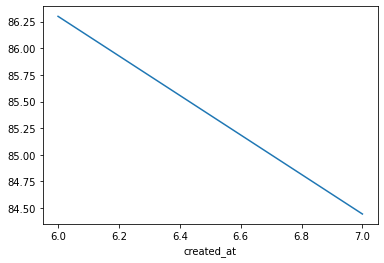

In [ ]:
EVTweets2['text'].str.len().groupby(by=EVTweets2.index.month).mean().plot()

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1136: UserWarning: Attempting to set identical left == right == 51.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


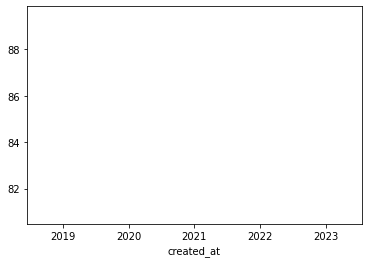

In [ ]:
EVTweets2['text'].str.len().resample('A').mean().plot() 

In [ ]:
EVTweets2['text'].resample('A').mean().plot() 

DataError: ignored

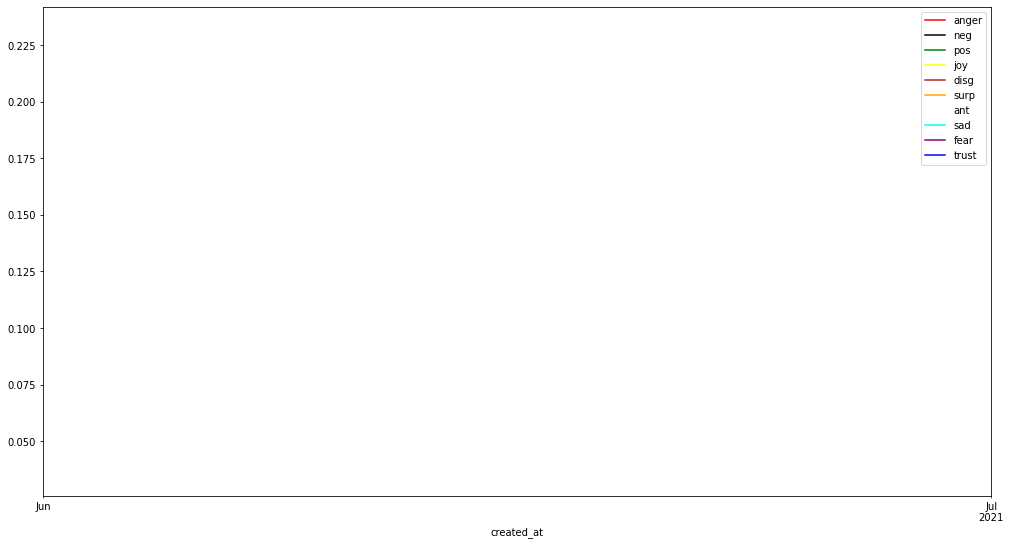

In [ ]:
ax = EVTweets2['anger'].resample('M').mean().plot(figsize=(16,7), 
                                                          color = 'red', label='anger')

EVTweets2['negative'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'neg', color = 'black')

EVTweets2['positivity'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'pos', color = 'green')

EVTweets2['joy'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'joy', color = 'yellow')

EVTweets2['disgust'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'disg', color = 'brown')

EVTweets2['surprise'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
          
                                                   label = 'surp', color = 'orange')
EVTweets2['anticipation'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'ant', color = 'white')

EVTweets2['sadness'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'sad', color = 'cyan')

EVTweets2['fear'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'fear', color = 'purple')

EVTweets2['trust'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

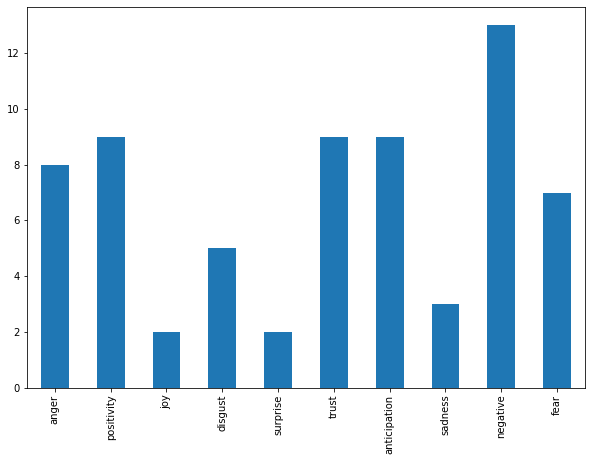

In [ ]:
EVTweets2[['anger','positivity','joy','disgust','surprise','trust','anticipation','sadness','negative','fear']].sum().plot(kind = 'bar', figsize=(10,7))